# Analyzing the success of video game titles

This dataframe presents sales numbers of video game titles in a multinational store. The objective is to identify patterns in games that achieve significant revenues in each region, providing information for the marketing team to plan their advertising actions.

## Reading the dataframe and importing modules and libraries

In [673]:
# Importing libraries

import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [674]:
# Reading the dataframe file

games = pd.read_csv('Projeto4/games.csv')

In [675]:
# Printing the first 10 rows of the dataframe

games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [676]:
# Printing some important informations

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [677]:
# Looking for duplicated rows

games.duplicated().sum()

0

Some observations:

1. The column names don't follow a consistent lowercase or uppercase pattern, which can create some problems in code writing.
2. The user scores are not being read as numbers but as objects.
3. There are missing values for name, year of release, genre, critic score, user score, and rating columns.


## Data Preprocessing



### Columns


The column titles should follow a consistent writing pattern, such as using lowercase letters, to facilitate the coding process.

In [678]:
# Substituting uppercase letters for lowercase letters in the column titles

games.columns = games.columns.str.lower()

### Name

The dataframe doesn't have duplicated rows, but some titles appear more than once in the dataframe.

In [679]:
# Counting how many times each title appears in the dataframe

games['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

This characteristic can be investigated by choosing one specific title that appears 2 or more times.

In [680]:
# Choosging the title 'Need for Speed: Most Wanted'

games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


With this sample, it's possible to see that some titles are repeated in the name column because they are offered on different platforms. In this case, this is not an error in the dataframe; it's valuable information for further analysis.

In [681]:
# Missing values in the name column

games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are just two rows with missing titles, for old games (30 years ago) and with no information about scores and ratings. That said, these rows will be deleted, as they will not be relevant for the purpose of this analysis.

In [682]:
# Deleting rows with missing values for the game title.

games = games.drop(games[games['name'].isna()].index).reset_index()

# Updating informations

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


### Platform

In [683]:
# Identifying unique values in this column

games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

The data seems correct, but as we did with the column names, here we will also use only lowercase letters to facilitate the coding process when assessing data about the platform.

In [684]:
# Substituting uppercase letters for lowercase letters

games['platform'] = games['platform'].str.lower()

### Year of release

There are missing values in this column, and studying the present values can be helpful to identify the best way to handle this problem.

In [685]:
# Numeric information about the year of release

games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<AxesSubplot:title={'center':'Games launched from 1980 to 2016'}, ylabel='Frequency'>

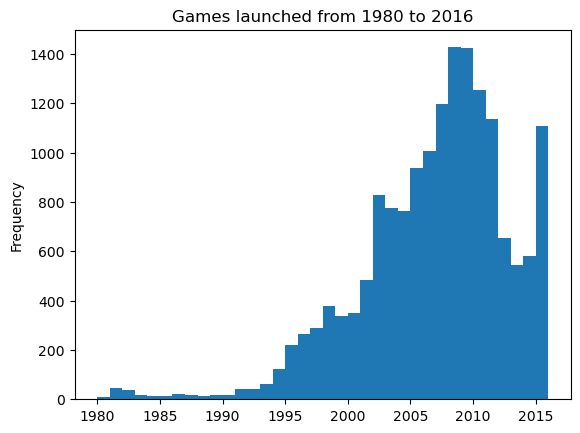

In [686]:
# Histogram depicting the distribution of the year of release in the dataframe.

games['year_of_release'].plot(kind = 'hist', bins = 36, title = 'Games launched from 1980 to 2016')

From the first to the last year of release in the dataframe, there are 36 possible values. In the histogram, it's possible to see that the distribution peak lies between 2005 and 2010, and there's another peak in 2016.

In [687]:
# Slice of the dataframe, considering only the rows with missing values for the year of release.

games[games['year_of_release'].isna()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,183,Madden NFL 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,377,FIFA Soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,456,LEGO Batman: The Videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,475,wwe Smackdown vs. Raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16373,PDC World Championship Darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,16405,Freaky Flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,16448,Inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,16458,Hakuouki: Shinsengumi Kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The mean and the median are close, and this slice corresponds to less than 2% of the rows in the dataframe.

In [688]:
len(games[games['year_of_release'].isna()])/len(games)*100

1.6095255190570215

In this case, replacing the missing values with the mean or the median seems reasonable.

However, replacing the values according to the platform can lead to better precision, based on the hypothesis that games launched for the same platform may have similar years of release.

In [689]:
# Mean and standard deviation of year of release grouped by platform

games.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['mean', 'std'])

,mean,std
,year_of_release,year_of_release
platform,,
2600,1982.137931,1.990834
3do,1994.666667,0.577350
3ds,2013.126953,1.647359
dc,1999.942308,1.808623
ds,2008.185290,1.778565
gb,1995.958763,4.178111
gba,2003.210851,1.474451
gc,2003.400369,1.391896


In fact, the mean of the year of release oscillates accordingly with the platform, and the standard deviation is not high for any of them, assuming a value higher than 3 only for two platforms. This endorses our hypothesis for the replacement.

In [690]:
# Grouping the mean value for platform

platform_year = games.groupby('platform')['year_of_release'].mean().astype('int')

# Printing a sample of the grouped data

platform_year.head()

platform
2600    1982
3do     1994
3ds     2013
dc      1999
ds      2008
Name: year_of_release, dtype: int32

In [691]:
# Replacing the missing values with the mean value of the year of release by platform

for key in platform_year.index:
    
    games.loc[((games['year_of_release'].isna()) & (games['platform'] == key)), 'year_of_release'] = platform_year.loc[key]

In [692]:
# Updating informations

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


**Note:** The missing values for the year of release were replaced by the mean value, grouped by platform.

### Genre

<AxesSubplot:title={'center':'Games launched by genre'}>

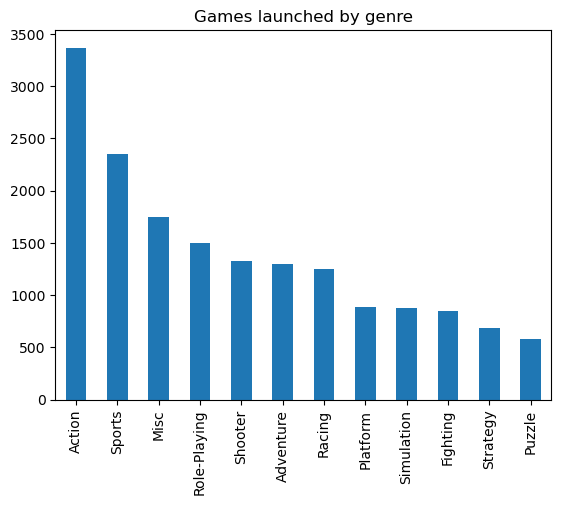

In [693]:
# Genre distribution of the games in the dataframe

games['genre'].value_counts().plot(kind = 'bar', title = 'Games launched by genre')

The data seems correct. Again, it's better to have the information presented only using lowercase letters.

In [694]:
# Substituting uppercase letters for lowercase letters

games['genre'] = games['genre'].str.lower()

### Sales

There are 4 columns for revenue in different regions of the planet with sales of each game. There are no missing values in these columns.

In [695]:
# Numeric information for sales columns

games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


The majority of the games sold less than 1 million dollars. The upper third quartile shows 240,000 dollars of revenue, a value more than a hundred times smaller than the highest value in the same column. These numbers, which could be considered outliers, will not be removed or processed, as they are good indicators of success in a game. However, it's possible to see that the mean is not good to summarize the data, as it's strongly affected by outliers — in this case, the median will be more informative.

<AxesSubplot:title={'center':'Sales in each region from 1980 to 2016'}, xlabel='year_of_release'>

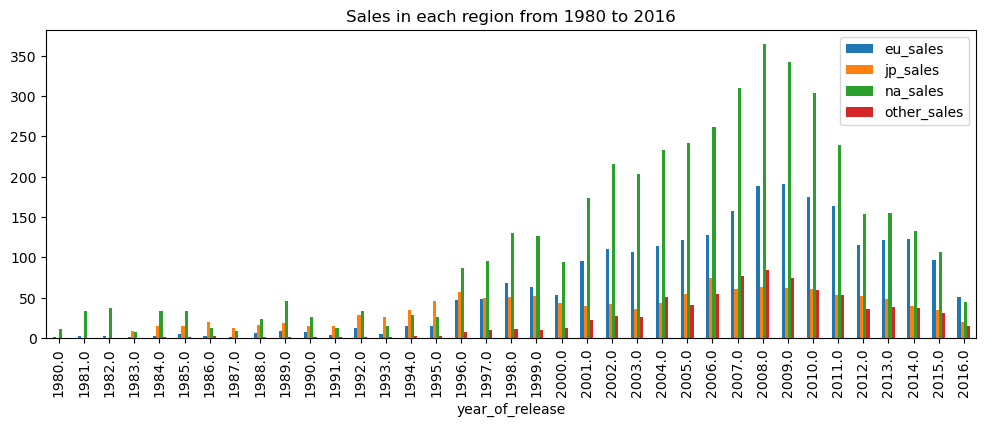

In [696]:
# Total sales for year of release

games.pivot_table(index = 'year_of_release', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').plot(kind = 'bar', figsize = (12, 4), title = 'Sales in each region from 1980 to 2016')

<AxesSubplot:title={'center':'Sales in each region for different genres'}, xlabel='genre'>

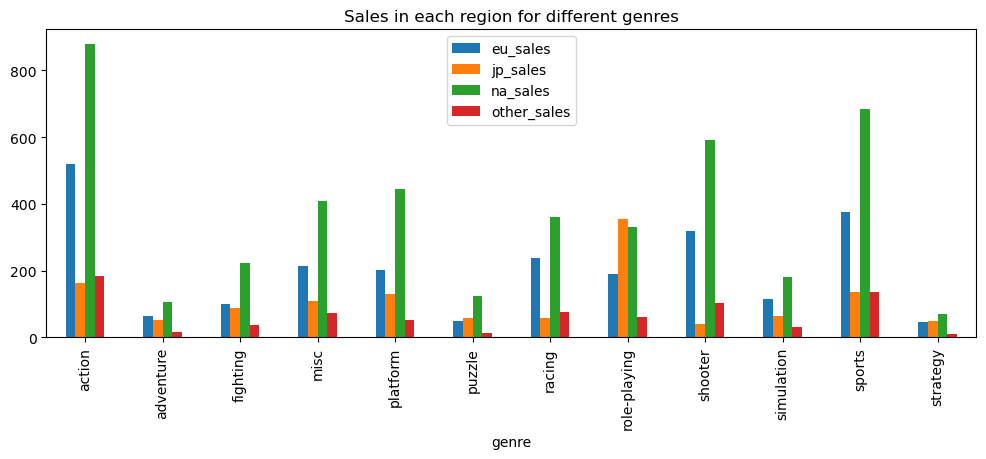

In [697]:
# Total sales for genre

games.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').plot(kind = 'bar', figsize = (12, 4), title = 'Sales in each region for different genres')

Plotting some information about the sales for the year of release and genre, it's possible to see the importance of North America in this industry for this sample. Another interesting observation is about the peak for the year of release, in 2008. This is probably related to the fact that more games were launched in this year, as we saw before.

In [698]:
# Creating a column for the total sales

games['total_sales'] = games['na_sales'] + games['jp_sales'] + games['eu_sales'] + games['other_sales']

<AxesSubplot:title={'center':'Total sales by year'}, xlabel='year_of_release'>

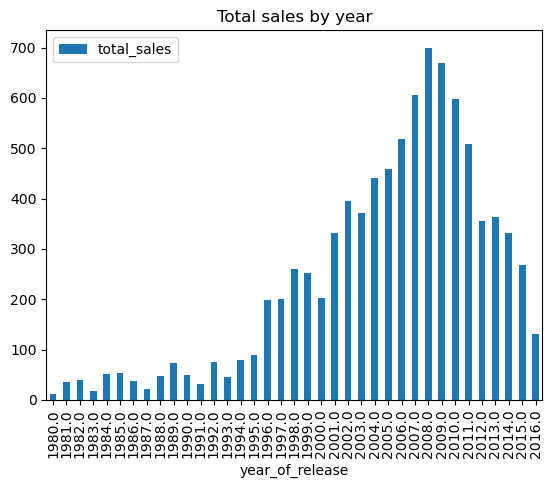

In [699]:
games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', title = 'Total sales by year')

<AxesSubplot:title={'center':'Total sales by genre'}, xlabel='genre'>

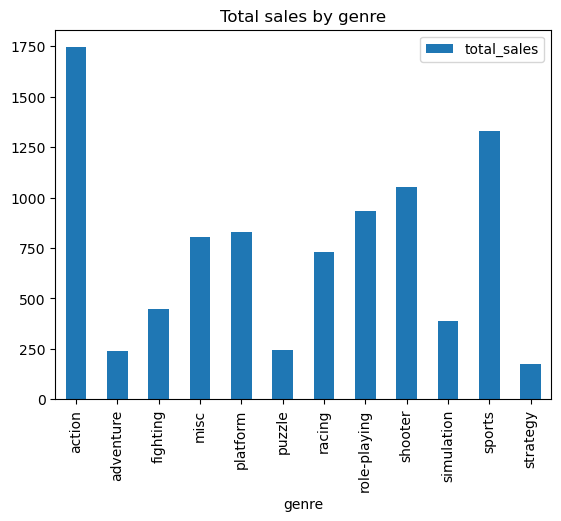

In [700]:
games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', title = 'Total sales by genre')

A column with the total sales is useful to analyze some information without having to consider the four regions presented in the dataframe.

### Users and critic score

The datatype of this data is not numeric, indicating that there are probably some rows with text in these columns.

In [701]:
# Unique values for user score

games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

As we suspected, there is text information in some rows, specifically "tbd" (to be determined).

In [702]:
# Slicing the dataframe, considering only the rows with 'tbd' for user score

games_tbd = games.query('user_score == "tbd"')

# Printing a sample of this slice

games_tbd

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,119,Zumba Fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,301,Namco Museum: 50th Anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,520,Zumba Fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,645,uDraw Studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,657,Frogger's Adventures: Temple of the Frog,gba,2003.0,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16693,16695,Planet Monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16695,16697,Bust-A-Move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16696,16698,Mega Brain Boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16702,16704,Plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Apparently, there is no specific reason for these notes to not be determined, as we can see a lot of variations among the data in other columns. So, this data will be treated as missing values, as long as there is not an obvious information that should show us what to do in each row. Also, the rows will not be deleted, as they represent a significant part of the dataframe.

In [703]:
# Proportion of tbd rows for user score

len(games_tbd)/len(games)*100

14.503679770238737

Almost 15% of the rows have 'tbd' as the value for the user score. Let's analyze this data to choose a way to treat this issue.

In [704]:
# Replacing 'tbd' for null values

games['user_score'] = games['user_score'].replace('tbd', None)

# Changing the user score column datatype

games['user_score'] = games['user_score'].astype('float')

In [705]:
# Studying correlations between numeric values

games.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000000,0.187490,-0.401627,-0.377475,-0.268251,-0.332583,-0.364577,-0.150698,-0.427388
year_of_release,0.187490,1.000000,-0.093148,0.004648,-0.165587,0.038212,0.011024,-0.265766,-0.075859
na_sales,-0.401627,-0.093148,1.000000,0.765341,0.449668,0.638695,0.240755,0.086200,0.941021
eu_sales,-0.377475,0.004648,0.765341,1.000000,0.435079,0.722796,0.220752,0.055337,0.901239
jp_sales,-0.268251,-0.165587,0.449668,0.435079,1.000000,0.291090,0.152593,0.125598,0.612334
other_sales,-0.332583,0.038212,0.638695,0.722796,0.291090,1.000000,0.198554,0.057119,0.749280
critic_score,-0.364577,0.011024,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878,0.245507
user_score,-0.150698,-0.265766,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000,0.088179
total_sales,-0.427388,-0.075859,0.941021,0.901239,0.612334,0.749280,0.245507,0.088179,1.000000


There is a strong positive correlation between user score and critic score. As we don't have any other correlation as strong as this one, we need to choose whether we use this information to replace the missing values or not. One possibility is to replace the missing values for critic score with the user score and to replace the missing values for user score with critic score when it's possible. This could be interesting, but it will probably introduce some bias in the dataframe, as the scores were given by two different audiences. Using the mean or median value leads us to a not so interesting situation, as the chosen value will represent 15% of the values, a considerably high number. In this case, we will choose to follow with other correlation to try to present better possibilities.

In [706]:
# Printing numeric information for critic score

games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

The scores were given on two different scales: users give scores between 0 and 10, and critics between 0 and 100. We will use the same reference just to help us compare the values.

In [707]:
# Changing the scale

games['user_score'] = games['user_score']*10

# Printing a sample

games.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Considering the genre to replace the missing values, it's possible to calculate some important values.

In [708]:
# Mean and standard deviation for critic score and user score, grouped by genre

games.pivot_table(index = 'genre', values = ['user_score', 'critic_score'], aggfunc = ['mean', 'std'])

mean                     std           
             critic_score user_score critic_score user_score
genre                                                       
action          66.629101  70.540437    14.206877  14.253936
adventure       65.331269  71.330000    13.920756  16.556413
fighting        69.217604  73.025063    14.280079  14.026514
misc            66.619503  68.193622    14.152649  15.472065
platform        68.058350  73.014019    13.213760  15.136221
puzzle          67.424107  71.750000    12.735444  15.197389
racing          67.963612  70.361934    14.248234  15.465083
role-playing    72.652646  76.195155    11.999835  10.886866
shooter         70.181144  70.418831    14.552571  15.180850
simulation      68.619318  71.345930    12.409558  16.215013
sports          71.968174  69.611967    13.878433  16.113704
strategy        72.086093  72.951768    11.828475  16.342136

We could think about replacing the values by the mean according to the genre of the game. However, looking at this table, we can see that the mean values are close for different genres, and the standard deviation is too high. The values would not be much different from the general mean.

In [709]:
# Mean for critic and user scores

games[['critic_score', 'user_score']].mean()

critic_score    68.967679
user_score      71.250461
dtype: float64

In [710]:
# Standard deviation for critic and user scores

games[['critic_score', 'user_score']].std()

critic_score    13.938165
user_score      15.000061
dtype: float64

Another possibility is to consider a platform grouping.

In [711]:
# Mean and standard deviation for critic score and user score, grouped by platform

games.pivot_table(index = 'platform', values = ['user_score', 'critic_score'], aggfunc = ['mean', 'std'])

mean                     std           
         critic_score user_score critic_score user_score
platform                                                
3ds         67.101190  68.316092    12.426377  14.249960
dc          87.357143  85.285714     5.865245   9.168748
ds          63.761506  70.251938    13.575478  15.082636
gba         67.372146  76.768627    13.310269  14.352062
gc          69.488839  75.975410    13.439561  13.748104
pc          75.928671  70.624675    11.170775  15.299631
ps          71.515000  78.654321    16.710054  13.319449
ps2         68.727273  76.268332    13.075177  13.093018
ps3         70.382927  67.265678    14.043094  14.612229
ps4         72.091270  67.482490    12.485992  14.594810
psp         67.424242  72.282660    11.706168  12.269723
psv         70.791667  73.363636    10.859605  13.754152
wii         62.823932  67.426786    14.877172  17.393016
wiiu        70.733333  69.040000    14.689903  14.354051
x360        68.616812  66.835404    15.016585  14.413322
xb          69.859310  75.005119    14.061411  15.098592
xone        73.325444  65.214286    12.953465  13.809406

The same considerations for the genre grouping could be said here. Another possibility is to try to find a relation between the total sales and the scores—the correlation is not too high (0,24), but it's worth trying.

In [712]:
# Creating categories for the total sales, organizing them into 10 levels according to 10 quantiles.

level = {}

for i in range(1, 10):
    level [i] = games['total_sales'].quantile(q = i/10)

# Function that categorizes the data using the parameters above.

def sales_grouped(row):

    total = row['total_sales']
    
    i = 1
    while i < 10:
        if total <= level[i]:
            return i
        else:
            i += 1
    else:
        return 10

In [713]:
# Creating a new column for level sales

games['sales_level'] = games.apply(sales_grouped, axis = 1)

In [714]:
# Mean and standard deviation for critic score and user score, grouped by sales level

games.pivot_table(index = 'sales_level', values = ['user_score', 'critic_score'], aggfunc = ['mean', 'std'])

mean                     std           
            critic_score user_score critic_score user_score
sales_level                                                
1              64.503906  68.378076    14.491376  16.661299
2              63.792916  69.260490    13.821929  16.923035
3              63.797386  69.488636    14.049881  16.320784
4              63.090909  67.931959    13.981958  17.401717
5              64.740881  68.530583    13.644950  16.411686
6              65.791351  69.837398    12.825871  14.664672
7              68.563743  71.322929    12.376901  14.469968
8              70.500528  72.167528    12.202171  13.409341
9              74.256506  73.354264    11.476293  12.979421
10             80.056466  75.597161    10.819413  12.820149

<AxesSubplot:title={'center':'Mean scores grouped by sales level'}, xlabel='sales_level'>

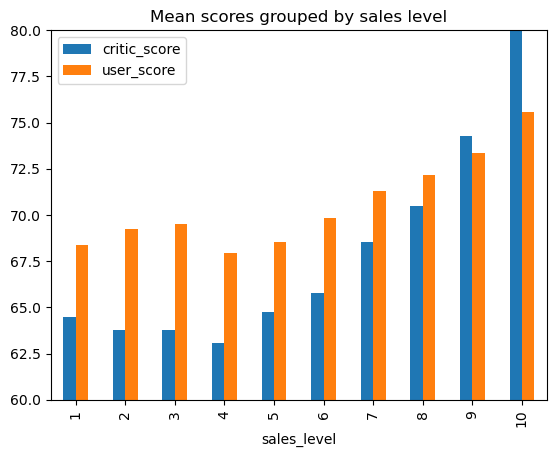

In [715]:
# Graphic with the mean values grouped by sales level

games.pivot_table(index = 'sales_level', values = ['user_score', 'critic_score'], aggfunc = 'mean').plot(kind = 'bar', ylim = (60, 80), title = 'Mean scores grouped by sales level')

In fact, it's possible to see that games with higher revenues, in general, have higher scores. The standard deviation is still high (compared to the genre or platform grouping), but at least we can find a better pattern with this action. The missing values will be replaced using this categorization.

In [716]:
# Mean of user score grouped by sales level

user_level = games.groupby('sales_level')['user_score'].mean()

user_level

sales_level
1     68.378076
2     69.260490
3     69.488636
4     67.931959
5     68.530583
6     69.837398
7     71.322929
8     72.167528
9     73.354264
10    75.597161
Name: user_score, dtype: float64

In [717]:
# Replacing values

for key in user_level.index:
    games.loc[(games['user_score'].isna()) & (games['sales_level'] == key), 'user_score'] = user_level.loc[key]

In [718]:
# Mean of critic score grouped by sales level

critic_level = games.groupby('sales_level')['critic_score'].mean()

critic_level

sales_level
1     64.503906
2     63.792916
3     63.797386
4     63.090909
5     64.740881
6     65.791351
7     68.563743
8     70.500528
9     74.256506
10    80.056466
Name: critic_score, dtype: float64

In [719]:
# Replacing values

for key in critic_level.index:
    games.loc[(games['critic_score'].isna()) & (games['sales_level'] == key), 'critic_score'] = critic_level[key]

In [720]:
# Updating informations

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     16713 non-null  float64
 10  user_score       16713 non-null  float64
 11  rating           9949 non-null   object 
 12  total_sales      16713 non-null  float64
 13  sales_level      16713 non-null  int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 1.8+ MB


There is no missing values for score columns anymore.

### Rating

In [721]:
# Distribution of rating values in the dataframe

games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

"Rating" is a categorical variable with a similar distribution for four categories (Everyone, Teens, Mature, and Everyone 10+), and it's important to consider the best option for replacing missing values, as it can be a very important variable to define the success of a game.

Text(0.5, 1.0, 'Ratings by genre')

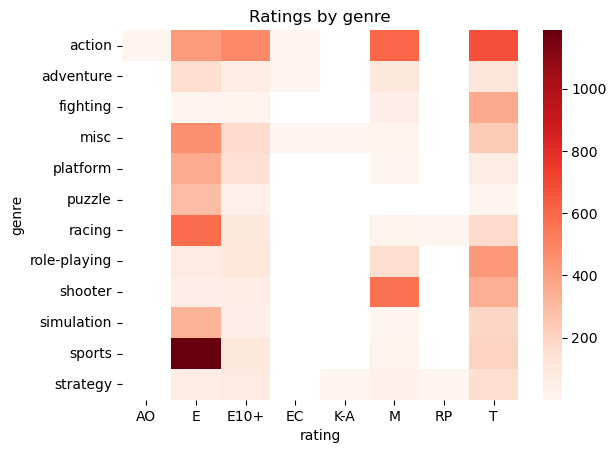

In [722]:
# Heatmap with ratings grouped by genre

sns.heatmap(games.pivot_table(index = 'genre', columns = 'rating', values = 'name', aggfunc = 'count'), cmap = 'Reds')

plt.title('Ratings by genre')

Even for genre, the distribution is diverse, as there are several games of the same genre with ratings M, T, and E. In this case, we will choose to fill the missing values with 'N/I' (not informed). This will not be prejudicial, as it's not a numeric variable, and this will not lead us to misinterpretations caused by our manipulations.

In [723]:
# Filling missing values with 'N/I'

games.loc[games['rating'].isna(), 'rating'] = 'N/I'

In [724]:
# Updating infos

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     16713 non-null  float64
 10  user_score       16713 non-null  float64
 11  rating           16713 non-null  object 
 12  total_sales      16713 non-null  float64
 13  sales_level      16713 non-null  int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 1.8+ MB


### Conclusion

Every missing value in the dataset has been filled, and some values were altered or substituted to facilitate the coding process and the analysis. Two new columns were created with relevant information. A sample of this new dataframe can be seen below.

In [725]:
# Sample of the processed dataframe

games.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
0,0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.000000,80.000000,E,82.54,10
1,1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,80.056466,75.597161,N/I,40.24,10
2,2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.000000,83.000000,E,35.52,10
3,3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.000000,80.000000,E,32.77,10
4,4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,80.056466,75.597161,N/I,31.38,10
5,5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,80.056466,75.597161,N/I,30.26,10
6,6,New Super Mario Bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.000000,85.000000,E,29.80,10
7,7,Wii Play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.000000,66.000000,E,28.91,10
8,8,New Super Mario Bros. Wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.000000,84.000000,E,28.32,10
9,9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,80.056466,75.597161,N/I,28.31,10


## Exploratory Data Analysis

At this point, some relations had already been investigated to fill some of the missing values. So we will continue to explore some interesting information in this dataframe.

### Annual revenue

As we have already observed, the number of games launched increased, in general, until 2008, with a new peak in 2016.

<AxesSubplot:title={'center':'Games launched from 2008 to 2016'}, ylabel='Frequency'>

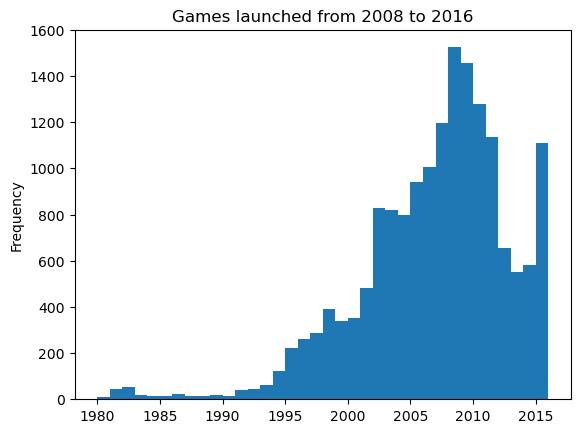

In [726]:
# Games launched in each year

games['year_of_release'].plot(kind = 'hist', bins = 36, title = 'Games launched from 2008 to 2016')

We can look into the revenue in these years.

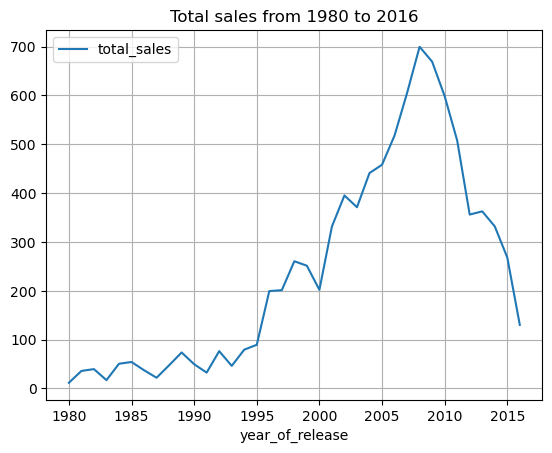

In [727]:
# Plotting the total sales for year

games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'line', title = 'Total sales from 1980 to 2016')

plt.grid()

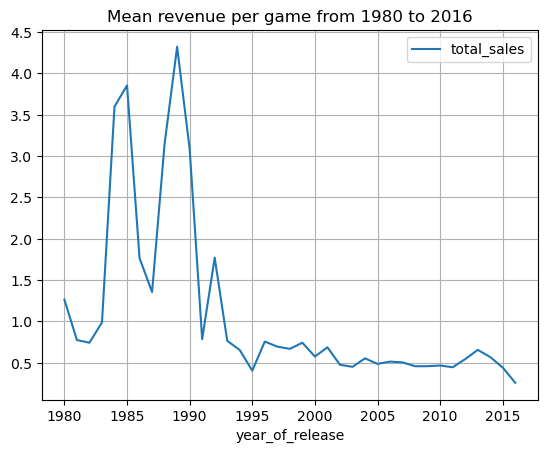

In [728]:
# Plotting the mean revenue for year

games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'mean').plot(kind = 'line', title = 'Mean revenue per game from 1980 to 2016')

plt.grid()

The revenue is increasing, but the mean value is higher for years before 1990, becoming almost linear after this year. This indicates that even though the revenue is higher, the number of games launched is also higher, and even that some games may have a great revenue, they represent outliers in this dataframe. In fact, we can look into the revenue for each game to explore this.

<AxesSubplot:title={'center':'Total sales for each game for year'}, xlabel='year_of_release', ylabel='total_sales'>

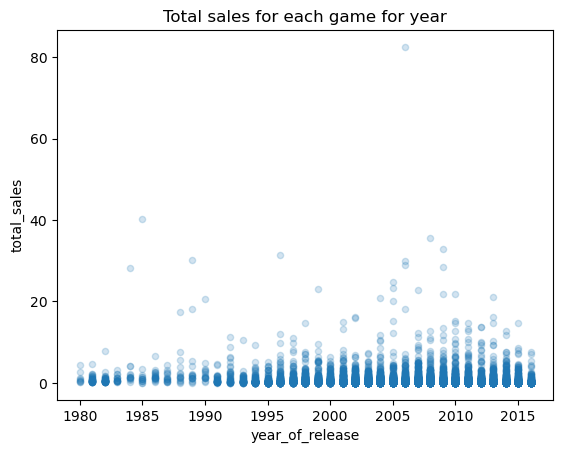

In [729]:
# Plotting the revenue for game in the dataframe

games[['year_of_release', 'total_sales']].plot(
    kind = 'scatter', x = 'year_of_release', y = 'total_sales', alpha = 0.2, title = 'Total sales for each game for year')

The transparency is more sensible until 2000, as fewer games were launched each year. It's possible to see that few games have a revenue higher than 5 million dollars, and the high concentration of values at the bottom of the graphic indicates revenue made by many games with low revenue and only some games with a big revenue. The next graphic shows the boxplots for revenue in each year, endorsing this analysis. We used a low range to be possible to see the boxplots after 1995.

In [730]:
# Plotting the revenue for game in the dataframe

fig = px.box(games, x='year_of_release', y="total_sales", range_y = (0, 10), title = 'Total sales for each game for year')
fig.show()

### Platforms revenue

The revenue varies also according to the platform.

In [731]:
# Table comparing the revenue with the number of games launched in each platform

platform_sales = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['sum', 'count']).sort_values(by = ('sum', 'total_sales'), ascending = False)

platform_sales.columns = ['total_sales', 'games']

# Printing a sample

platform_sales.head(10)

,total_sales,games
platform,,
ps2,1255.77,2161
x360,971.42,1262
ps3,939.65,1331
wii,907.51,1320
ds,806.12,2151
ps,730.86,1197
gba,317.85,822
ps4,314.14,392
psp,294.05,1209


Only the PS2 has a revenue higher than 1 billion dollars. However, there are more than 2 thousand games launched for this platform, which is 900 more than the second place in revenue. We can imagine that the mean revenue for platforms may be higher for old platforms, as fewer games were launched for them. This will be analyzed in the two graphics following.

<AxesSubplot:title={'center':'Total sales for platform'}, xlabel='platform'>

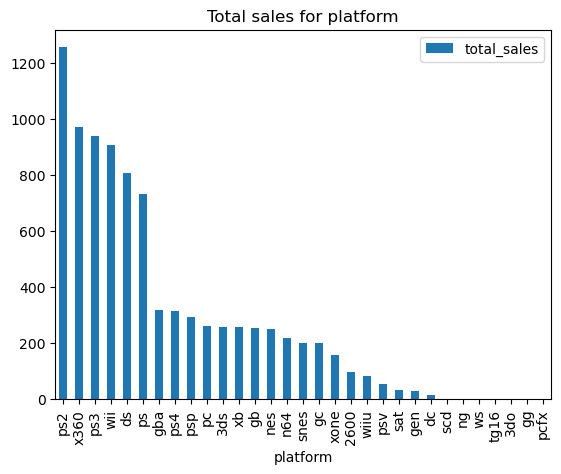

In [732]:
# Plotting the total sales for platform

games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).plot(kind = 'bar', title = 'Total sales for platform')

<AxesSubplot:title={'center':'Mean revenue for platform'}, xlabel='platform'>

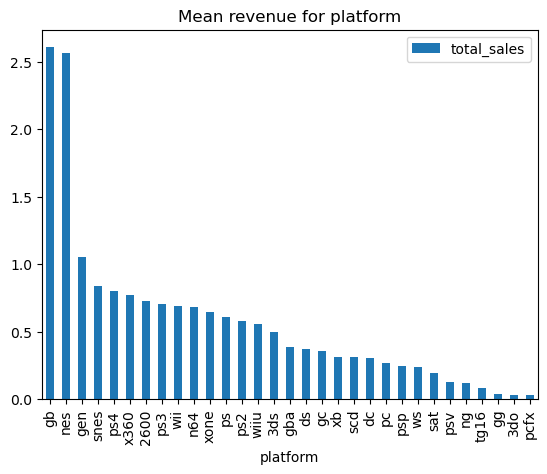

In [733]:
# Plotting the mean revenue for platform

games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'mean').sort_values(by = 'total_sales', ascending = False).plot(kind = 'bar', title = 'Mean revenue for platform')

Even though the PS2 has a higher total revenue, it's only the 13th best platform in terms of mean revenue per game. The X360, PS3, and Wii are the next three platforms in revenue and outperform the PS2 in this scenario.

Text(0.5, 1.0, 'Total sales for the platforms with best revenue per year')

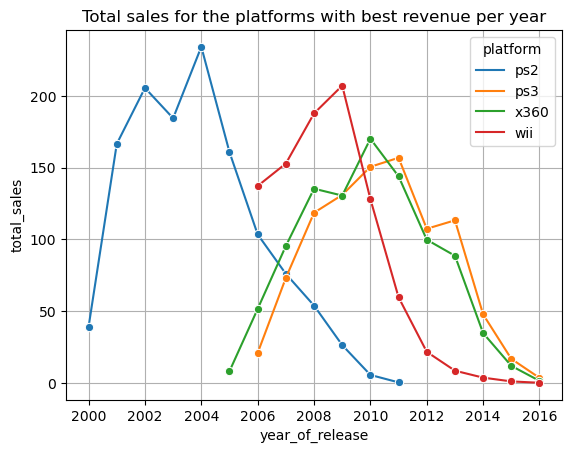

In [734]:
# Plotting the revenue per year for the best 4 platforms, in terms of total revenue

sns.lineplot(data = games, x= "year_of_release", y = "total_sales", hue = 'platform', estimator = 'sum', marker = 'o', hue_order = ['ps2', 'ps3', 'x360', 'wii'], ci = None)

plt.grid()

plt.title('Total sales for the platforms with best revenue per year')

The format of the graphics is similar – the revenue starts to increase until a certain point, then it begins to decrease. It's important for us to understand this movement, as it's crucial for choosing the best games to be part of the marketing campaign. The games should be associated with platforms that are still profitable. It's also interesting to observe that the revenue peak for PS3 occurs in the same year that the revenue for the PS2 is zero. This may lead us to some hypotheses about the PS4.

Text(0.5, 1.0, 'Revenue for year for each platform')

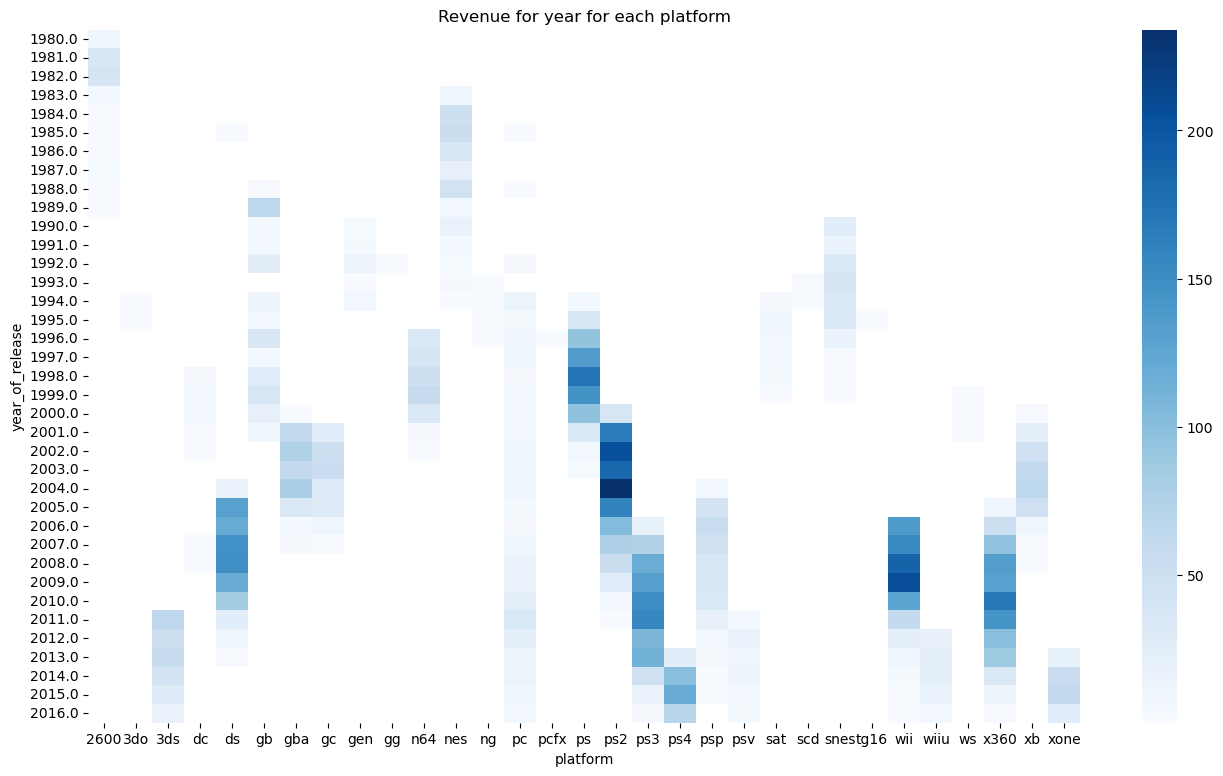

In [735]:
# Plotting the revenue per year for each platform, in terms of total revenue

plt.subplots(figsize=(16,9))

sns.heatmap(games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum'), cmap = 'Blues')

plt.title('Revenue for year for each platform')

The observed pattern of increasing and decreasing revenue for the platforms is intriguing. While it's not a universal rule, as seen with platforms like GB and NES, this pattern is prevalent across many platforms. This graphic also reveals platforms with significant revenues in the last 3 years (3DS, PC, PS3, PS4, PSV, WiiU, Wii, X360, and XOne), and most platforms don't have many years of considerable revenues.

In [736]:
# Number of years that each platform had any revenue

platform_sales_year.count().sort_values(ascending = False)

platform
pc      26
gb      13
nes     12
x360    12
psp     12
ps2     12
wii     11
ds      11
ps3     11
2600    10
snes    10
ps      10
xb       9
gba      8
dc       7
gc       7
n64      7
sat      6
3ds      6
psv      6
wiiu     5
gen      5
ng       4
ps4      4
xone     4
ws       3
scd      2
3do      2
tg16     1
gg       1
pcfx     1
dtype: int64

In [737]:
# Mean total sales by platform

platform_sales_year.count().mean()

7.67741935483871

In [768]:
# Median total sales by platform

platform_sales_year.count().median()

7.0

The platform lifetime of revenue varies from 1 to 26 years, but in general, it's possible to observe a tendency of values ranging from 6 to 11 years. PC represents the highest value, but as many platforms were replaced by newer and more powerful versions, such as the Sony platforms (PS1, PS2, PS3, PS4), the evolution of the PC didn't change the name of the platform - the oldest PC is completely different from the newest, but for the dataframe, they are considered the same. To avoid this outlier that impacts the mean value, we will consider 7 years of revenue for a platform, which is the median value, to suggest insights for the marketing team.

In [739]:
# Dataframe considering games launched in the last 7 years

games_active = games[games['year_of_release'] > 2009].reset_index(drop = True)

games_active = games_active.drop('index', axis = 1)

# Informations about this new dataframe

games_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5311 non-null   object 
 1   platform         5311 non-null   object 
 2   year_of_release  5311 non-null   float64
 3   genre            5311 non-null   object 
 4   na_sales         5311 non-null   float64
 5   eu_sales         5311 non-null   float64
 6   jp_sales         5311 non-null   float64
 7   other_sales      5311 non-null   float64
 8   critic_score     5311 non-null   float64
 9   user_score       5311 non-null   float64
 10  rating           5311 non-null   object 
 11  total_sales      5311 non-null   float64
 12  sales_level      5311 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 539.5+ KB


A significant amount of data is ignored by this dataframe; however, this slice represents a dataframe that is much more interesting for the purpose of this analysis.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

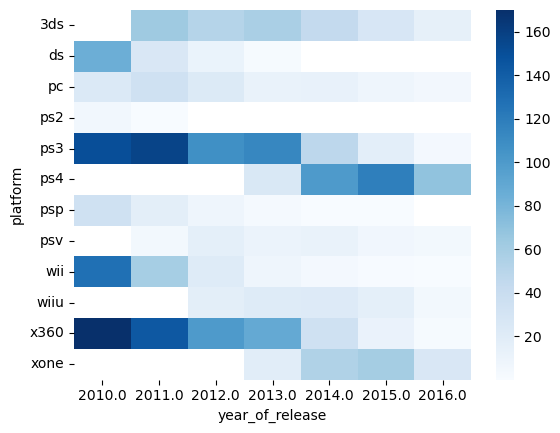

In [740]:
# Total sales in the last 7 years by platform

sales_seven_years = games_active.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

sns.heatmap(sales_seven_years, cmap = 'Blues')

The number of platforms is considerably smaller and excludes platforms that don't have games being launched anymore. Even in this slice, we see platforms that had a strongly decreasing revenue, such as DS, PS2, PSP, which means that they are not interesting for advertising actions. It's better to choose platforms that have a growing revenue or, for platforms with decreasing revenue, choose only the ones with a considerable amount of sales in the last 2 or 3 years.

In [741]:
# Percentual variation of revenue in the last 3 years

sales_seven_years['var13_14'] = 100*(sales_seven_years[2014] - sales_seven_years[2013])/sales_seven_years[2013]
sales_seven_years['var14_15'] = 100*(sales_seven_years[2015] - sales_seven_years[2014])/sales_seven_years[2014]
sales_seven_years['var15_16'] = 100*(sales_seven_years[2016] - sales_seven_years[2015])/sales_seven_years[2015]

sales_seven_years

year_of_release,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,var13_14,var14_15,var15_16
platform,,,,,,,,,,
3ds,NaN,63.20,51.36,57.76,43.76,27.78,15.14,-24.238227,-36.517367,-45.500360
ds,85.02,26.18,11.01,1.54,NaN,NaN,NaN,NaN,NaN,NaN
pc,24.28,35.03,23.22,12.38,13.28,8.52,5.25,7.269790,-35.843373,-38.380282
ps2,5.64,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ps3,150.48,156.78,107.36,113.25,47.76,16.82,3.60,-57.827815,-64.782245,-78.596908
ps4,NaN,NaN,NaN,25.99,100.00,118.90,69.25,284.763371,18.900000,-41.757780
psp,35.04,17.82,7.69,3.14,0.24,0.12,NaN,-92.356688,-50.000000,NaN
psv,NaN,4.63,16.19,10.59,12.16,6.25,4.25,14.825307,-48.601974,-32.000000
wii,127.95,59.65,21.71,8.59,3.75,1.14,0.18,-56.344587,-69.600000,-84.210526


Now, we can see the variation of revenue for each year, since 2013. Positive numbers of variation indicate an increase in selling, and negatives indicate decreasing. We will only suggest platforms for the advertising plans of next year that follow two conditions:

1. The revenue in 2016 is higher than 1% of the total revenue of the company in this year; 
2. The variation from 2014 to 2015 doesn't have a redution higher than 50% compared to the variation from 2015 to 2016.

In [742]:
# Revenue for 2016

sales_2016 = games_active[games_active['year_of_release'] == 2016]['total_sales'].sum()

sales_2016

# Compiling a list of platforms that follow the initial criteria.

sales_2016_fraction = sales_2016/100

list_criteria_1 = games_active.query('year_of_release == 2016').pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').query('total_sales > @sales_2016_fraction').index.to_list()

# Printing the list

list_criteria_1 

['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wiiu', 'x360', 'xone']

In [743]:
# Compiling a list of platforms that follow the second criteria.

list_criteria_2 = sales_seven_years[(sales_seven_years['var14_15'] > -50) | (sales_seven_years['var15_16'] > -50)].index.to_list()

# Printing the list

list_criteria_2

['3ds', 'pc', 'ps4', 'psv', 'wiiu', 'xone']

In [744]:
# Creating a list of platforms that follow both criterias

important_platforms = []

for element in list_criteria_1:
    if element in list_criteria_2:
        important_platforms.append(element)

# Printing the list
        
important_platforms

['3ds', 'pc', 'ps4', 'psv', 'wiiu', 'xone']

In [745]:
# Dataframe with these platforms

important_games = games_active.query('platform in @important_platforms')

# Printing information

important_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 5 to 5310
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2215 non-null   object 
 1   platform         2215 non-null   object 
 2   year_of_release  2215 non-null   float64
 3   genre            2215 non-null   object 
 4   na_sales         2215 non-null   float64
 5   eu_sales         2215 non-null   float64
 6   jp_sales         2215 non-null   float64
 7   other_sales      2215 non-null   float64
 8   critic_score     2215 non-null   float64
 9   user_score       2215 non-null   float64
 10  rating           2215 non-null   object 
 11  total_sales      2215 non-null   float64
 12  sales_level      2215 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 242.3+ KB


This dataframe has just 2215 rows, but we've picked each one carefully to ensure we can offer the best suggestions for the marketing team.

In [746]:
# Numeric information of the total sales for these selected platforms

important_games['total_sales'].describe()

count    2215.000000
mean        0.447260
std         1.120853
min         0.010000
25%         0.040000
50%         0.110000
75%         0.360000
max        14.630000
Name: total_sales, dtype: float64

In [747]:
# Plotting information about total sales for these selected platforms

fig = px.box(important_games, x = 'platform', y = "total_sales", title = 'Total sales for each platform')
fig.show()

The boxplots indicate that the revenue for PSV, PC, and 3DS is less significant, while the other three platforms generally exhibit better results and are quite similar. Notably, only games for 3DS and PS4 surpass 8 million dollars in revenue, rendering these two platforms particularly intriguing.

<AxesSubplot:title={'center':'Mean and median for total sales by platform'}, xlabel='platform'>

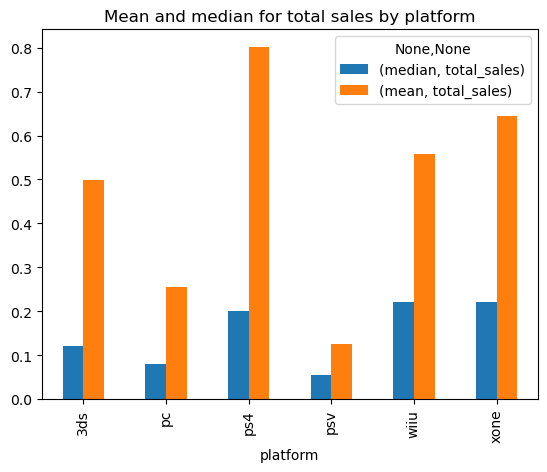

In [748]:
# Mean and median for total sales

important_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['median', 'mean']).plot(kind = 'bar', title = 'Mean and median for total sales by platform')

Median values are significantly smaller for every platform, which makes sense given the numerous outliers in the dataframe. Either way, it's clear that the PS4, 3DS, WiiU, and XOne are more impactful on the company's revenue.

In [749]:
# Table showing revenue across different regions

important_games.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3ds,61.48,100.67,83.49,13.36
pc,68.82,0.00,39.07,14.07
ps4,141.09,15.96,108.74,48.35
psv,13.12,21.91,12.58,6.46
wiiu,25.13,13.01,38.10,5.95
xone,51.59,0.34,93.12,14.27


Finally, we can determine the most crucial platforms for each region. Advertising strategies could benefit from regionalization, recommending unique games based on the target audience. In summary:

1. 3DS and PS4 should be profitable in all regions.
2. PC and Xbox are not interesting in Japan.
3. WiiU is interest in Europe, the USA, and Japan.
4. PSV is best utilized exclusively in Japanese campaigns.

### Revenue and scores

In [750]:
# Correlation between numeric variables in the dataframe

important_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,sales_level
year_of_release,1.000000,-0.009145,-0.005658,-0.017024,0.011950,0.026165,0.036715,-0.008797,-0.087890
na_sales,-0.009145,1.000000,0.781036,0.418568,0.834245,0.362759,0.046006,0.927571,0.526184
eu_sales,-0.005658,0.781036,1.000000,0.337790,0.931980,0.363254,0.019369,0.917180,0.504117
jp_sales,-0.017024,0.418568,0.337790,1.000000,0.254281,0.159840,0.149494,0.582231,0.279789
other_sales,0.011950,0.834245,0.931980,0.254281,1.000000,0.357113,0.027825,0.899410,0.505256
critic_score,0.026165,0.362759,0.363254,0.159840,0.357113,1.000000,0.438125,0.377035,0.477975
user_score,0.036715,0.046006,0.019369,0.149494,0.027825,0.438125,1.000000,0.066458,0.064225
total_sales,-0.008797,0.927571,0.917180,0.582231,0.899410,0.377035,0.066458,1.000000,0.547883
sales_level,-0.087890,0.526184,0.504117,0.279789,0.505256,0.477975,0.064225,0.547883,1.000000


There's a robust correlation between sales and critic scores across all observed regions, with a slightly weaker connection in Japan. Conversely, in Japan, the correlation between sales and user scores is more pronounced. Based on this dataframe, we can infer:

1. Critic scores have an impact on sales globally.
2. User scores significantly influence sales in Japan.

In [751]:
# Plotting critic and user scores in comparison to total sales in Europe.

fig = px.scatter(important_games, x = ['critic_score', 'user_score'], y = "eu_sales", title = 'Total sales in Europe', opacity = 0.6)
fig.show()

In [752]:
# Plotting critic and user scores in comparison to total sales in Japan.

fig = px.scatter(important_games, x = ['critic_score', 'user_score'], y = "jp_sales", title = 'Total sales in Japan', opacity = 0.6)
fig.show()

In [753]:
# Plotting critic and user scores in comparison to total sales in the USA.

fig = px.scatter(important_games, x = ['critic_score', 'user_score'], y = "na_sales", title = 'Total sales in the USA', opacity = 0.6)
fig.show()

In the graphics, the trend of our observations is evident. An intriguing aspect is the presence of numerous games with high scores but relatively modest total sales. This suggests that while scores can influence a game's success, they are not the sole determinants.

### Revenue and genre

In [754]:
# Table with numeric information about sales by genre

important_games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count', 'mean', 'median']).sort_values(('mean', 'total_sales'), ascending = False)

,sum,count,mean,median
,total_sales,total_sales,total_sales,total_sales
genre,,,,
shooter,185.03,175,1.057314,0.370
platform,65.56,77,0.851429,0.210
sports,103.03,170,0.606059,0.185
role-playing,167.57,299,0.560435,0.150
racing,49.97,97,0.515155,0.130
fighting,30.68,64,0.479375,0.120
simulation,45.24,101,0.447921,0.100
action,249.38,734,0.339755,0.110


While action games boast the highest total sales, the mean is not exceptionally high due to the volume of games in this genre. The data has been sorted by mean revenue, a sequence that closely aligns with what would result from sorting by the median. Consequently, it's reasonable to infer that shooter, platform, and sport games are more lucrative than other genres. On the flip side, the prevalence of action games should be considered, indicating a significant endorsement for this genre within the game industry.

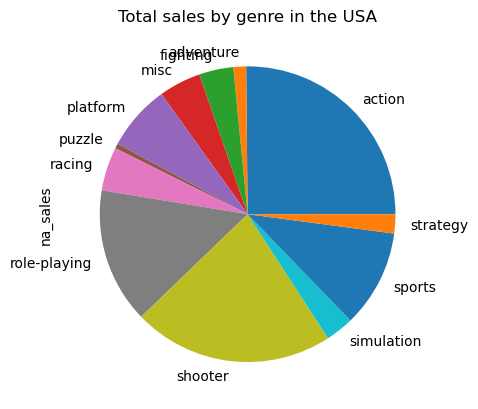

In [755]:
# Mean revenue by genre in the USA

important_games.pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = 'sum').plot(
    kind = 'pie', y = 'na_sales', legend = False, normalize = True, title = 'Total sales by genre in the USA')

plt.show()

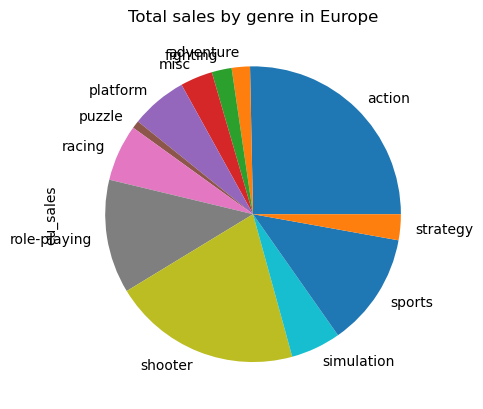

In [756]:
# Mean revenue by genre in Europe

important_games.pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = 'sum').plot(
    kind = 'pie', y = 'eu_sales', legend = False, normalize = True, title = 'Total sales by genre in Europe')

plt.show()

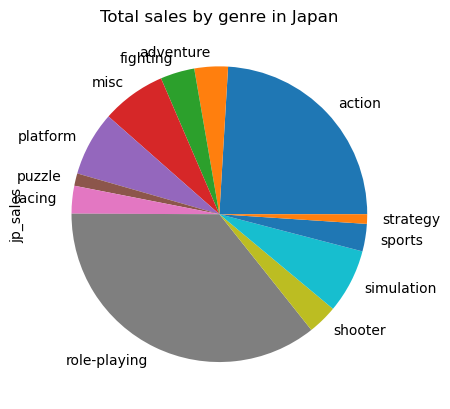

In [757]:
# Mean revenue by genre in Japan

important_games.pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = 'sum').plot(
    kind = 'pie', y = 'jp_sales', legend = False, normalize = True, title = 'Total sales by genre in Japan')

plt.show()

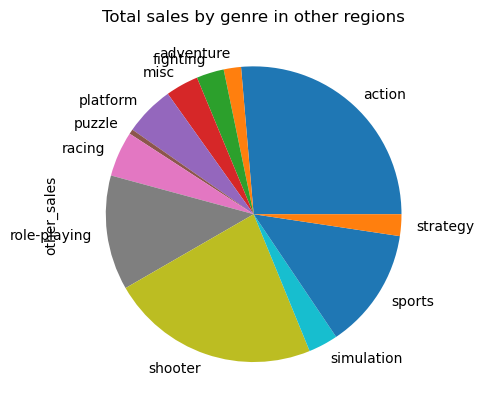

In [758]:
# Mean revenue by genre in other regions

important_games.pivot_table(
    index = 'genre', values = 'other_sales', aggfunc = 'sum').plot(
    kind = 'pie', y = 'other_sales', legend = False, normalize = True, title = 'Total sales by genre in other regions')

plt.show()

In the graphics for each region, it's evident that shooter, sports, and action games play a substantial role in the total sales across all regions, except in Japan. In Japan, role-playing and simulation games also contribute significantly to sales, alongside action games that exhibit strong performance globally.

In [759]:
# Games with higher values for total sales

important_games.groupby('name')['total_sales'].sum().sort_values(ascending = False).head()

name
Call of Duty: Black Ops 3         22.28
Grand Theft Auto V                19.26
Pokemon X/Pokemon Y               14.60
Call of Duty: Advanced Warfare    13.33
Fallout 4                         12.67
Name: total_sales, dtype: float64

It's possible to analyze specific titles, particularly focusing on games with the highest total sales. Examining the details of these five games could provide valuable insights.

In [760]:
# Information about 'Call of Duty: Black Ops 3'

important_games[important_games['name'] == 'Call of Duty: Black Ops 3']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
5,Call of Duty: Black Ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,80.056466,75.597161,N/I,14.63,10
36,Call of Duty: Black Ops 3,xone,2015.0,shooter,4.59,2.11,0.01,0.68,80.056466,75.597161,N/I,7.39,10
1785,Call of Duty: Black Ops 3,pc,2015.0,shooter,0.00,0.25,0.00,0.01,68.563743,71.322929,N/I,0.26,7


In [761]:
# Information about 'Grand Theft Auto V'

important_games[important_games['name'] == 'Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
13,Grand Theft Auto V,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,10
58,Grand Theft Auto V,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47,10
488,Grand Theft Auto V,pc,2015.0,action,0.39,0.69,0.00,0.09,96.0,79.0,M,1.17,9


In [762]:
# Information about 'Pokemon X/Pokemon Y'

important_games[important_games['name'] == 'Pokemon X/Pokemon Y']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
7,Pokemon X/Pokemon Y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,80.056466,75.597161,N/I,14.6,10


In [763]:
# Information about 'Call of Duty: Advanced Warfare'

important_games[important_games['name'] == 'Call of Duty: Advanced Warfare']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
32,Call of Duty: Advanced Warfare,ps4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66,10
61,Call of Duty: Advanced Warfare,xone,2014.0,shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26,10
1307,Call of Duty: Advanced Warfare,pc,2014.0,shooter,0.15,0.23,0.00,0.03,78.0,45.0,M,0.41,8


In [764]:
# Information about 'Fallout 4'

important_games[important_games['name'] == 'Fallout 4']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_level
39,Fallout 4,ps4,2015.0,role-playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17,10
90,Fallout 4,xone,2015.0,role-playing,2.51,1.32,0.01,0.38,88.0,62.0,M,4.22,10
444,Fallout 4,pc,2015.0,role-playing,0.51,0.67,0.00,0.10,84.0,54.0,M,1.28,10


The revenue generated by PS4 and XOne exceed that of other platforms. The 3DS stands out solely for 'Pokemon X/Pokemon Y,' an exclusive title for this platform. In terms of genres, we observe two shooter and two role-playing games, aligning with the popularity of these genres, as previously discussed.

<AxesSubplot:title={'center':'Total sales for region'}, xlabel='genre'>

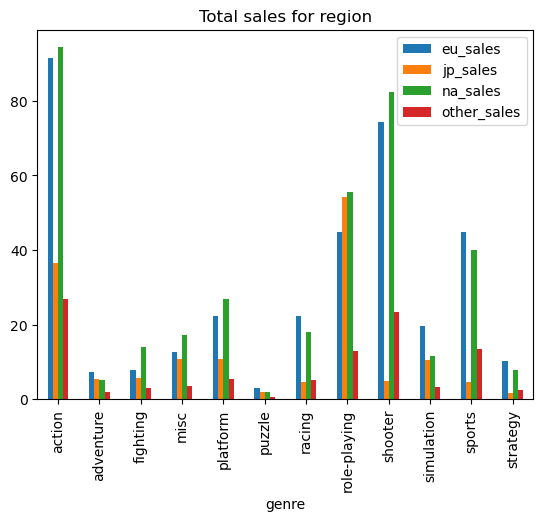

In [765]:
# Total sales for region

important_games.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum').plot(kind = 'bar', title = 'Total sales for region')

In general, the preferred genres for each region are as follows:

**Japan:** Role-playing, Action, and Simulation

**Europe:** Action, Shooter, and Sports

**USA:** Shooter, Action, Role-playing, and Sports

**Other regions:** Action, Shooter, and Role-playing

### Revenue and rating

In [766]:
# Mean and meadian for sales, grouped by rating

important_games.pivot_table(index = 'rating', values = 'total_sales', aggfunc = ['mean', 'median', 'sum', 'count']).sort_values(('mean', 'total_sales'), ascending = False)

,mean,median,sum,count
,total_sales,total_sales,total_sales,total_sales
rating,,,,
M,0.782229,0.235,273.78,350
E,0.692315,0.140,215.31,311
E10+,0.393701,0.240,100.00,254
T,0.371923,0.130,135.38,364
N/I,0.285188,0.060,266.08,933
EC,0.045000,0.045,0.09,2
RP,0.040000,0.040,0.04,1


For total sales, games with a Mature (M) rating consistently appear at the top of the mean values, and there's a significant number of games in this category, second only to games rated T (Teen). This suggests that Mature-rated games have a substantial impact on sales. The second position in terms of mean values is held by games with an Everyone (E) rating, indicating that this rating category also contributes considerably to sales. It's worth noting that the 'N/I' (Not Indicated) category has not been considered in this observation.

<AxesSubplot:xlabel='rating'>

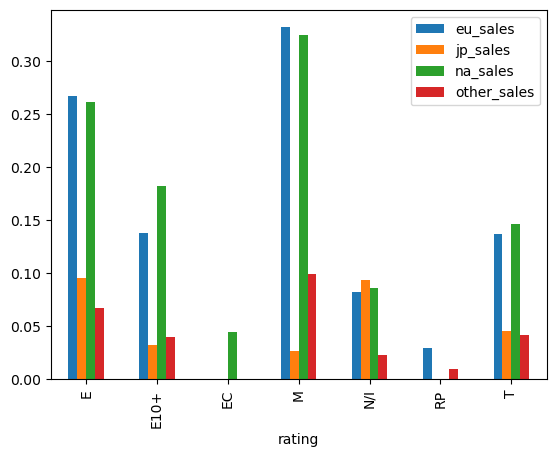

In [767]:
# Mean revenue in each region, grouped by rating

important_games.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'mean').plot(kind = 'bar')

With the data organized regionally, a clear pattern can be seen, indicating that a Mature (M) rating has a negative impact on sales in Japan. Nevertheless, games with an Everyone (E) rating consistently show reasonable mean values globally.

## Conclusions

Advertising actions should be carried out on the 3DS, PC, PS4, PSV, WiiU, and Xbox One platforms, as other platforms are not expected to yield significant returns in the coming year. For regional actions, the following suggestions are possible:

1. **Japan:** 3DS, PSV, PS4, and WiiU
2. **Europe:** PS4, PC, 3DS, and Xbox One
3. **USA:** PS4, Xbox One, and 3DS
4. **Other regions:** PS4, Xbox One, PC, and 3DS

Critic scores have a significant impact on purchases in all locations (with less impact in Japan). As a result, well-reviewed games by critics can be highlighted in advertising actions. In Japan, user ratings have a strong influence, so these ratings can also be included in advertisements, using a popular rating app within the country.

Regarding game genres, there are regional preferences, with differences primarily for Japan. In general, advertising actions can highlight the following genres according to location:

1. **Japan:** Role-playing, Action, and Simulation
2. **Europe:** Action, Shooter, and Sports
3. **USA:** Shooter, Action, Role-playing, and Sports
4. **Other regions:** Action, Shooter, and Role-playing

Finally, the age rating of the advertised games can be considered. The consumption difference is more pronounced when comparing Japan with other locations, so advertising actions can be defined according to the following criteria:

1. **Japan:** Emphasize games with a "Everyone" (E) rating.
2. **Other locations:** Emphasize adult (M) and "Everyone" (E) rated games.